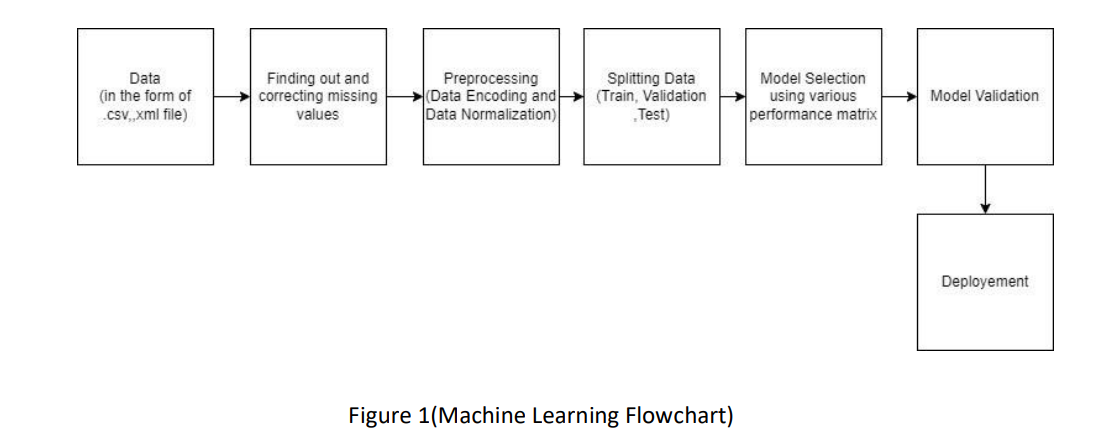

#DATA

#1. Importing libraries

In [448]:
pip install seaborn

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [449]:
pip install category-encoders

You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [450]:
import pandas as pd
# import polars as p
import numpy as np
import seaborn as sns

# Import label encoder
from sklearn import preprocessing

import matplotlib.pyplot as plt

# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

import warnings
warnings.filterwarnings(action = "ignore")


#2. Importing data

In [451]:
data = pd.read_csv("../dataset.csv")

In [452]:
# Previewing data
data.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Datasource,Class,Topic,Question,Data_Value_Unit,Data_Value_Type,...,GeoLocation,ClassID,TopicID,QuestionID,DataValueTypeID,LocationID,StratificationCategory1,Stratification1,StratificationCategoryId1,StratificationID1
0,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Total,Total,OVR,OVERALL
1,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Male,GEN,MALE
2,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Gender,Female,GEN,FEMALE
3,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,Less than high school,EDU,EDUHS
4,2011,2011,AL,Alabama,Behavioral Risk Factor Surveillance System,Obesity / Weight Status,Obesity / Weight Status,Percent of adults aged 18 years and older who ...,NaN,Value,...,"(32.84057112200048, -86.63186076199969)",OWS,OWS1,Q036,VALUE,1,Education,High school graduate,EDU,EDUHSGRAD


#3. Data Understanding

**DATASET DESCRIPTION**


YearStart  -  Year start

YearEnd	-  Year End (for single-year indicator, year end=year start)

LocationAbbr	- Location abbreviation

LocationDesc	- Location description

Datasource	- Name or abbreviation of Data Source

Class	- Class Description

Topic	- Topic Description

Question	- Question Description

Data_Value_Unit	- Description of unit e.g. %, etc

Data_Value_Type	- Description of type of data e.g. Value, Percentage, Number

Data_Value	- Data value (percentage, text)

Data_Value_Alt	- Numeric representation of data value

Data_Value_Footnote_Symbol	- Symbol that would be used to flag footnotes

Data_Value_Footnote	- Footnote text

Low_Confidence_Limit	- Low 95% Confidence Interval value

High_Confidence_Limit	- High 95% Confidence Interval value

Sample_Size	- Sample Size

Total	- Total/Overall breakout category

Age(years)	- Age (years) breakout category

Education	- Education breakout category

Gender	- Gender breakout category

Income	- Income breakout category

Race/Ethnicity	- Race/Ethnicity breakout category

GeoLocation	- Latitude & Longitude to be provided for formatting GeoLocation or Geocode in the format (latitude, longitude)

ClassID	- Lookup identifier value for Class

TopicID	- Lookup identifier value for Topic

QuestionID	- Lookup identifier value for Question

DataValueTypeID	- Lookup identifier value for Data_Value_type

LocationID	- Lookup identifier value for Location

StratificationCategory1	- Lookup Identification value, such as Age Group, Gender

Stratification1	- Data stratified by this value, such as Male, Female, Total

StratificationCategoryId1  - Lookup identifier value for Stratification1

StratificationID1	- Lookup identifier value for StratificationCategory1


##1.Creating a function to be able to lower all letters in columns

In [453]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53392 entries, 0 to 53391
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   YearStart                   53392 non-null  int64  
 1   YearEnd                     53392 non-null  int64  
 2   LocationAbbr                53392 non-null  object 
 3   LocationDesc                53392 non-null  object 
 4   Datasource                  53392 non-null  object 
 5   Class                       53392 non-null  object 
 6   Topic                       53392 non-null  object 
 7   Question                    53392 non-null  object 
 8   Data_Value_Unit             0 non-null      float64
 9   Data_Value_Type             53392 non-null  object 
 10  Data_Value                  48346 non-null  float64
 11  Data_Value_Alt              48346 non-null  float64
 12  Data_Value_Footnote_Symbol  5046 non-null   object 
 13  Data_Value_Footnote         504

#Total columns

In [454]:
columns = data.columns
columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

###Looking at the above dataset our target variable is the column "Data_Value"


#Size of dataset

In [455]:
len(columns)

33

In [456]:
data.shape

(53392, 33)

#4.Looking for Null values

###4.2checking for any high percentage of missing value in columns


In [457]:
missing_percentage = data.isnull().sum() * 100 / len(data)
missing_percentage.sort_values(ascending=0)


Data_Value_Unit               100.000000
Total                          96.428304
Gender                         92.856608
Data_Value_Footnote_Symbol     90.549146
Data_Value_Footnote            90.549146
Education                      85.713215
Age(years)                     78.577315
Income                         74.998127
Race/Ethnicity                 71.426431
High_Confidence_Limit           9.450854
Low_Confidence_Limit            9.450854
Sample_Size                     9.450854
Data_Value                      9.450854
Data_Value_Alt                  9.450854
GeoLocation                     1.887923
TopicID                         0.000000
QuestionID                      0.000000
ClassID                         0.000000
DataValueTypeID                 0.000000
LocationID                      0.000000
StratificationCategory1         0.000000
Stratification1                 0.000000
StratificationCategoryId1       0.000000
YearStart                       0.000000
YearEnd         

In [458]:
non_null_count = data['Data_Value_Footnote_Symbol'].count()

# Count the number of times "~" appears in 'Data_Value_Footnote_Symbol' column
tilde_count = (data['Data_Value_Footnote_Symbol'] == "~").sum()

print(f"Count of non-null values in 'Data_Value_Footnote_Symbol': {non_null_count}")
print(f"Count of '~' in 'Data_Value_Footnote_Symbol': {tilde_count}")

Count of non-null values in 'Data_Value_Footnote_Symbol': 5046
Count of '~' in 'Data_Value_Footnote_Symbol': 5046


In [459]:
data = data[data['Data_Value_Footnote_Symbol'] != "~"]

In [460]:
data.shape

(48346, 33)

###There are many missing or null values in the dataset

Sabka year differnce = 1

In [461]:
mask = data['YearStart'] == data['YearEnd']

# Count the number of True values in the mask
num_rows_with_same_year = mask.sum()

print(f"Number of rows with the same 'yearstart' and 'yearend': {num_rows_with_same_year}")

Number of rows with the same 'yearstart' and 'yearend': 48346


sabka datasourcevalue = "Behavioral Risk Factor Surveillance System"

In [462]:
import pandas as pd

# Assuming your DataFrame is named 'data'
# Create a boolean mask for rows where 'source' is "Behavioral Risk Factor Surveillance System"
mask = data['Datasource'] == "Behavioral Risk Factor Surveillance System"

# Count the number of True values in the mask
num_values = mask.sum()

print(f"Number of values in 'source' column that are 'Behavioral Risk Factor Surveillance System': {num_values}")


Number of values in 'source' column that are 'Behavioral Risk Factor Surveillance System': 48346


In [463]:
data.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1'],
      dtype='object')

LocationDesc  =  beacause it is 98% coorelated to LocationAbbr column

In [464]:

data['LocationAbbr_encoded'] = label_encoder.fit_transform(data['LocationAbbr'])
data['Locationdesc_encoded'] = label_encoder.fit_transform(data['LocationDesc'])
data['LocationAbbr_encoded'].corr(data['Locationdesc_encoded'])

0.9803053330107729

Topic = beacuse it is 100% correlated with Class columnn

In [465]:

data['Class_encoded'] = label_encoder.fit_transform(data['Class'])
data['Topic_encoded'] = label_encoder.fit_transform(data['Topic'])
data['Class_encoded'].corr(data['Class_encoded'])

1.0

In [466]:

data['Question_encoded'] = label_encoder.fit_transform(data['Question'])
data['QuestionID_encoded'] = label_encoder.fit_transform(data['QuestionID'])
data['QuestionID_encoded'].corr(data['Question_encoded'])

0.17759858716275326

data_value_alt = it is 100% correlated to data_value 

In [467]:

data['Data_Value_Alt'].corr(data['Data_Value'])

1.0

In [468]:

data['ClassID_encoded'] = label_encoder.fit_transform(data['ClassID'])
data['TopicID_encoded'] = label_encoder.fit_transform(data['TopicID'])
data['ClassID_encoded'].corr(data['TopicID_encoded'])

1.0

In [469]:
data['ClassID_encoded'].corr(data['Class_encoded'])

1.0

Reason to remove columns 

yearstart and yearend => beacuse sab data 1 year ka hi h 


LocationDesc  =  beacause it is 98% coorelated to LocationAbbr column

daaSource me sabka value = "Behavioral Risk Factor Surveillance System"

Topic = beacuse it is 100% correlated with Class columnn

question = because we wil consider questionId

data_value_unit = becuse it i 100% null

data_value_alt = it is 100% correlated to data_value 

[
       'YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1',
       'LocationAbbr_encoded', 'Locationdesc_encoded', 'Class_encoded',
       'Topic_encoded', 'Question_encoded', 'QuestionID_encoded'
]
       

In [470]:
data['Stratification1_encoded'] = label_encoder.fit_transform(data['Stratification1'])

In [471]:
df = data

In [472]:
df.shape

(48346, 42)

In [473]:
df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource',
       'Class', 'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type',
       'Data_Value', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol',
       'Data_Value_Footnote', 'Low_Confidence_Limit', 'High_Confidence_Limit ',
       'Sample_Size', 'Total', 'Age(years)', 'Education', 'Gender', 'Income',
       'Race/Ethnicity', 'GeoLocation', 'ClassID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'LocationID', 'StratificationCategory1',
       'Stratification1', 'StratificationCategoryId1', 'StratificationID1',
       'LocationAbbr_encoded', 'Locationdesc_encoded', 'Class_encoded',
       'Topic_encoded', 'Question_encoded', 'QuestionID_encoded',
       'ClassID_encoded', 'TopicID_encoded', 'Stratification1_encoded'],
      dtype='object')

In [474]:
# columns_to_drop = ['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource', 'Class',  'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'GeoLocation', 'ClassID', 'DataValueTypeID', 'Stratification1', 'StratificationCategoryId1', 'StratificationID1' ]


columns_to_drop = ['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'Datasource', 'Class',  'Topic', 'Question', 'Data_Value_Unit', 'Data_Value_Type', 'Data_Value_Alt', 'Data_Value_Footnote_Symbol', 'Data_Value_Footnote', 'GeoLocation', 'ClassID', 'DataValueTypeID', 'Stratification1', 'StratificationCategoryId1', 'StratificationID1', 'Total', 'Gender' , 'Education' , 'Race/Ethnicity', 'Age(years)', 'Income', 'Low_Confidence_Limit', 'High_Confidence_Limit ']



In [475]:
# Use the drop method to drop the specified columns
df = df.drop(columns=columns_to_drop, axis=1)

In [476]:
encoded_column_drop = ['LocationAbbr_encoded', 'Locationdesc_encoded', 'Class_encoded', 'Topic_encoded', 'Question_encoded', 'QuestionID', 'ClassID_encoded', 'TopicID']

In [477]:
df = df.drop(columns=encoded_column_drop, axis=1)

In [478]:
df.shape

(48346, 7)

In [479]:
df.columns

Index(['Data_Value', 'Sample_Size', 'LocationID', 'StratificationCategory1',
       'QuestionID_encoded', 'TopicID_encoded', 'Stratification1_encoded'],
      dtype='object')

In [480]:
# df = pd.get_dummies(df, columns=['StratificationCategory1'], prefix='StratCat1')

df['StratificationCategory1']  = label_encoder.fit_transform(data['StratificationCategory1'])

# df = df.drop(columns='StratificationCategory1', axis=1)

In [481]:
df.shape

(48346, 6)

In [482]:
df.columns

Index(['Data_Value', 'Sample_Size', 'LocationID', 'QuestionID_encoded',
       'TopicID_encoded', 'Stratification1_encoded'],
      dtype='object')

In [483]:
missing_percentage = df.isnull().sum() * 100 / len(df)
missing_percentage.sort_values(ascending=0)

Data_Value                 0.0
Sample_Size                0.0
LocationID                 0.0
QuestionID_encoded         0.0
TopicID_encoded            0.0
Stratification1_encoded    0.0
dtype: float64

In [484]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48346 entries, 0 to 53386
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Data_Value               48346 non-null  float64
 1   Sample_Size              48346 non-null  float64
 2   LocationID               48346 non-null  int64  
 3   QuestionID_encoded       48346 non-null  int64  
 4   TopicID_encoded          48346 non-null  int64  
 5   Stratification1_encoded  48346 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 2.6 MB


In [485]:
df.head()

,Data_Value,Sample_Size,LocationID,QuestionID_encoded,TopicID_encoded,Stratification1_encoded
0,32.0,7304.0,1,2,1,27
1,32.3,2581.0,1,2,1,22
2,31.8,4723.0,1,2,1,16
3,33.6,1153.0,1,2,1,21
4,32.8,2402.0,1,2,1,18


# 6. Prediction of data_value



In [486]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.preprocessing import OneHotEncoder

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, mean_absolute_error

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV
import math

In [487]:
df1 = df
df1.shape

(48346, 6)

In [488]:
X = df1.drop(['Data_Value'],1)
Y = df1['Data_Value']

In [489]:
X.shape

(48346, 5)

In [490]:
Y.shape

(48346,)

In [491]:
Y

0        32.0
1        32.3
2        31.8
3        33.6
4        32.8
         ... 
53382    13.3
53383    25.3
53384    18.3
53385    24.1
53386    30.3
Name: Data_Value, Length: 48346, dtype: float64

In [492]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [493]:
size_scaler = preprocessing.StandardScaler().fit(X_train)

In [494]:
X_train_scaled = size_scaler.transform(X_train)
X_test_scaled = size_scaler.transform(X_test)

In [495]:
X_train_scaled.shape, X_test_scaled.shape

((38676, 5), (9670, 5))

In [496]:
# Initialize the linear regression model
model = LinearRegression()

In [497]:
# Fit the model to the training data
model.fit(X_train, Y_train)

LinearRegression()

In [498]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [499]:
mse = mean_squared_error(Y_test, y_pred)
r2 = r2_score(Y_test, y_pred)
rmse = np.sqrt(mse)

In [500]:

print(f"Mean Squared Error: {mse}")
print(f"R-squared (R2) Score: {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Squared Error: 89.78517689371705
R-squared (R2) Score: 0.1324952373397471
Root Mean Squared Error (RMSE): 9.475504044309044
